## 6.4 Machine Learning Part 1

### This script contains the following:

#### 1. Importing libraries and data
#### 2. Data cleaning
#### 3. Data prep for regression analysis
#### 4. Regression analysis
#### Bonus: performance improvement after removing outliers

### 1. Importing libraries and data

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
import os
import sklearn
from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

In [2]:
# This option ensures that the graphs you create are displayed within the notebook without the need to "call" them specifically.

%matplotlib inline

In [3]:
# Assigning the folder path to a variable
path = r"C:\Users\Toshiba\26-12-2023 Superstore Sales Analysis"

In [4]:
# Importing dataframe

sales = pd.read_csv(os.path.join(path, '02 Data', 'Prepared Data', 'Superstore_profit_sale_discount_year_col_add.csv'))

In [5]:
sales.head()

,Unnamed: 0,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Segment,Country,City,...,Sub-Category,Product Name,Sales,Quantity,Discount,Profit,profit_type,Sale_category,Discount_applied,Year
0,0,1,CA-2016-152156,2016-11-08,2016-11-11,Second Class,CG-12520,Consumer,United States,Henderson,...,Bookcases,Bush Somerset Collection Bookcase,261.9600,2,0.00,41.9136,Positive Profit,High Sale,No,2016
1,1,2,CA-2016-152156,2016-11-08,2016-11-11,Second Class,CG-12520,Consumer,United States,Henderson,...,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400,3,0.00,219.5820,Positive Profit,High Sale,No,2016
2,2,3,CA-2016-138688,2016-06-12,2016-06-16,Second Class,DV-13045,Corporate,United States,Los Angeles,...,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200,2,0.00,6.8714,Positive Profit,High Sale,No,2016
3,3,4,US-2015-108966,2015-10-11,2015-10-18,Standard Class,SO-20335,Consumer,United States,Fort Lauderdale,...,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775,5,0.45,-383.0310,Negative Profit,High Sale,Yes,2015
4,4,5,US-2015-108966,2015-10-11,2015-10-18,Standard Class,SO-20335,Consumer,United States,Fort Lauderdale,...,Storage,Eldon Fold 'N Roll Cart System,22.3680,2,0.20,2.5164,Positive Profit,High Sale,Yes,2015


### 2. Data cleaning

In [6]:
sales.shape

(9994, 25)

In [7]:
# Delete unnecessary columns
sales = sales.drop(columns=['Unnamed: 0'])

In [8]:
sales.head()

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Segment,Country,City,State,...,Sub-Category,Product Name,Sales,Quantity,Discount,Profit,profit_type,Sale_category,Discount_applied,Year
0,1,CA-2016-152156,2016-11-08,2016-11-11,Second Class,CG-12520,Consumer,United States,Henderson,Kentucky,...,Bookcases,Bush Somerset Collection Bookcase,261.9600,2,0.00,41.9136,Positive Profit,High Sale,No,2016
1,2,CA-2016-152156,2016-11-08,2016-11-11,Second Class,CG-12520,Consumer,United States,Henderson,Kentucky,...,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400,3,0.00,219.5820,Positive Profit,High Sale,No,2016
2,3,CA-2016-138688,2016-06-12,2016-06-16,Second Class,DV-13045,Corporate,United States,Los Angeles,California,...,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200,2,0.00,6.8714,Positive Profit,High Sale,No,2016
3,4,US-2015-108966,2015-10-11,2015-10-18,Standard Class,SO-20335,Consumer,United States,Fort Lauderdale,Florida,...,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775,5,0.45,-383.0310,Negative Profit,High Sale,Yes,2015
4,5,US-2015-108966,2015-10-11,2015-10-18,Standard Class,SO-20335,Consumer,United States,Fort Lauderdale,Florida,...,Storage,Eldon Fold 'N Roll Cart System,22.3680,2,0.20,2.5164,Positive Profit,High Sale,Yes,2015


In [9]:
sales.columns

Index(['Row ID', 'Order ID', 'Order Date', 'Ship Date', 'Ship Mode',
       'Customer ID', 'Segment', 'Country', 'City', 'State', 'Postal Code',
       'Region', 'Product ID', 'Category', 'Sub-Category', 'Product Name',
       'Sales', 'Quantity', 'Discount', 'Profit', 'profit_type',
       'Sale_category', 'Discount_applied', 'Year'],
      dtype='object')

##### Missing values

In [10]:
# Check for missing values

sales.isnull().sum()

# No missing values to handle

Row ID              0
Order ID            0
Order Date          0
Ship Date           0
Ship Mode           0
Customer ID         0
Segment             0
Country             0
City                0
State               0
Postal Code         0
Region              0
Product ID          0
Category            0
Sub-Category        0
Product Name        0
Sales               0
Quantity            0
Discount            0
Profit              0
profit_type         0
Sale_category       0
Discount_applied    0
Year                0
dtype: int64

##### Duplicates check

In [12]:
dups = sales.duplicated()

In [13]:
dups.shape # No dups

(9994,)

##### Extreme values checks

C:\Users\Toshiba\AppData\Local\Temp\ipykernel_4920\850381994.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(sales['Profit'], bins=25) # Shows extreme values


<Axes: xlabel='Profit', ylabel='Density'>

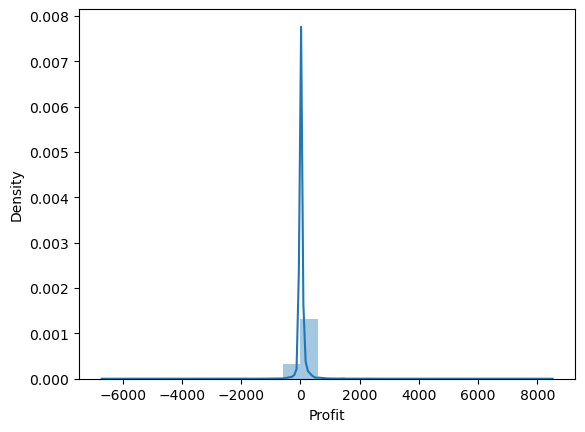

In [22]:
sns.distplot(sales['Profit'], bins=25) # Shows extreme values

# Some of the outliers in the high values may need to be removed, but let's try without doing so first.

In [16]:
sales['Profit'].mean() # Check the mean

28.65689630778467

In [17]:
sales['Profit'].median() # Check the median

8.6665

In [18]:
sales['Profit'].max() # Check the max

8399.976

In [23]:
sales['Profit'].min() # Check the min

-6599.978

C:\Users\Toshiba\AppData\Local\Temp\ipykernel_4920\2603807321.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(sales['Sales'], bins=25) # Shows extreme values


<Axes: xlabel='Sales', ylabel='Density'>

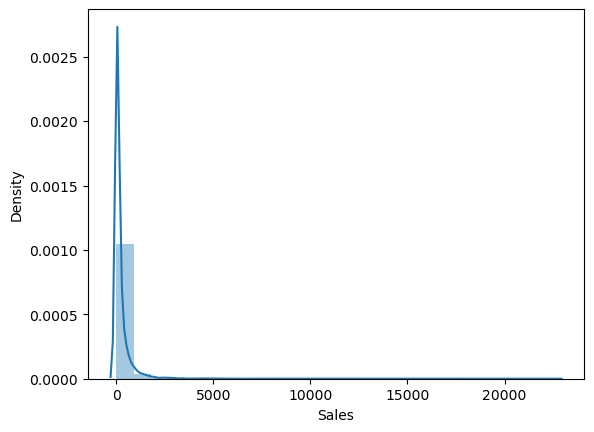

In [28]:
sns.distplot(sales['Sales'], bins=25) # Shows extreme values

# Some of the outliers in the high values may need to be removed, but let's try without doing so first.

In [24]:
sales['Sales'].mean() # Check the mean

229.85800083049833

In [25]:
sales['Sales'].median() # Check the median

54.489999999999995

In [26]:
sales['Sales'].max() # Check the max


22638.48

### 3. Data prep for regression analysis 

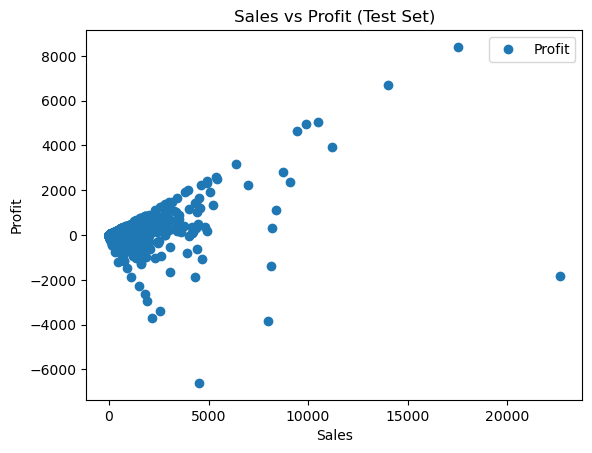

In [58]:
# Create a scatterplot using matplotlib for another look at how the chosen variables plot against each other.

sales.plot(x = 'Sales', y='Profit',style='o') # The style option creates a scatterplot; without it, we only have lines.
plt.title('Sales vs Profit (Test Set)')  
plt.xlabel('Sales')  
plt.ylabel('Profit')  
plt.show()

### Hypothesis  - As the Sale goes up, the profit also goes up.

In [31]:
# Reshape the variables into NumPy arrays and put them into separate objects.

X = sales['Sales'].values.reshape(-1,1)
y = sales['Profit'].values.reshape(-1,1)

In [32]:
X

array([[261.96 ],
       [731.94 ],
       [ 14.62 ],
       ...,
       [258.576],
       [ 29.6  ],
       [243.16 ]])

In [33]:
y

array([[ 41.9136],
       [219.582 ],
       [  6.8714],
       ...,
       [ 19.3932],
       [ 13.32  ],
       [ 72.948 ]])

In [34]:
# Split data into a training set and a test set.

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

### 4. Regression analysis

In [35]:
# Create a regression object.

regression = LinearRegression()  # This is the regression object, which will be fit onto the training set.

In [36]:
# Fit the regression object onto the training set.

regression.fit(X_train, y_train)

LinearRegression()

In [37]:
# Predict the values of y using X.

y_predicted = regression.predict(X_test)

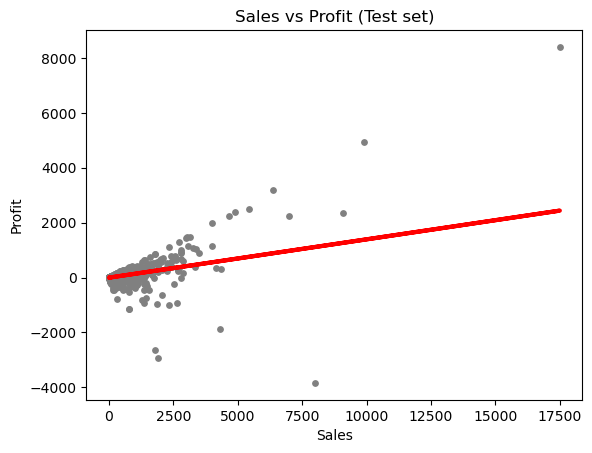

In [38]:
# Create a plot that shows the regression line from the model on the test set.

plot_test = plt
plot_test.scatter(X_test, y_test, color='gray', s = 15)
plot_test.plot(X_test, y_predicted, color='red', linewidth =3)
plot_test.title('Sales vs Profit (Test set)')
plot_test.xlabel('Sales')
plot_test.ylabel('Profit')
plot_test.show()

In [39]:
# Create objects that contain the model summary statistics.

rmse = mean_squared_error(y_test, y_predicted) # This is the mean squared error
r2 = r2_score(y_test, y_predicted) # This is the R2 score. 

In [40]:
# Print the model summary statistics. This is where you evaluate the performance of the model.

print('Slope:' ,regression.coef_)
print('Mean squared error: ', rmse)
print('R2 score: ', r2)

Slope: [[0.13956559]]
Mean squared error:  51349.125157537026
R2 score:  0.3077658276679903


### Slope    : A positive value of slope indicates that as sale increases, profit also increases.
### MSE      : Its value is quite large indicating that this is not the best model to represent this data.
### R2 score : Its value indicates a poor fit model as its closer to zero. (0 indicates poor fit and 1 indicates good fit)

### By considering the above values, its a poor fit model.

In [41]:
y_predicted

array([[-1.75662971e+00],
       [-1.85432563e+00],
       [-1.03056598e-01],
       ...,
       [ 2.45360996e+02],
       [ 2.87136527e+00],
       [ 2.24946099e+00]])

In [42]:
# Create a dataframe comparing the actual and predicted values of y.

data = pd.DataFrame({'Actual': y_test.flatten(), 'Predicted': y_predicted.flatten()})
data.head(30)

,Actual,Predicted
0,11.6800,-1.756630
1,9.7438,-1.854326
2,2.6406,-0.103057
3,17.7450,34.608581
4,6.4428,-2.250134
5,12.9740,0.554576
6,25.6800,4.540570
7,286.3836,217.034764
8,-52.8908,16.807380
9,909.9818,483.452915


### The predicted values are very far off from the actual valuesn. This model is not good at predicting the profit based on the sale.

##### Compare how the regression fits the training set

In [43]:
# Predict.

y_predicted_train = regression.predict(X_train) # This is predicting X_train!

In [44]:
rmse = mean_squared_error(y_train, y_predicted_train)
r2 = r2_score(y_train, y_predicted_train)

In [45]:
print('Slope:' ,regression.coef_)
print('Mean squared error: ', rmse)
print('R2 score: ', r2)

Slope: [[0.13956559]]
Mean squared error:  39304.14892318878
R2 score:  0.15617731199139873


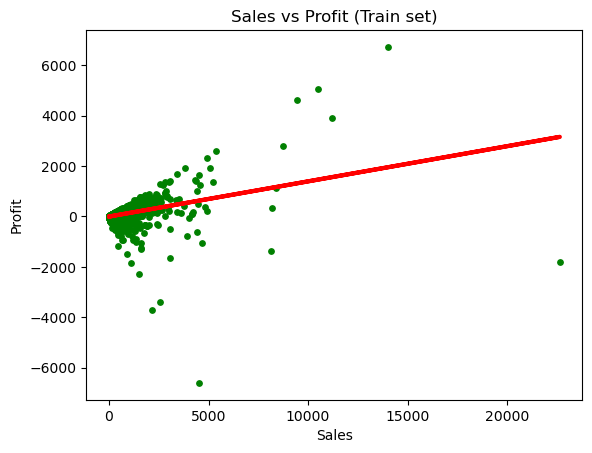

In [46]:
# Visualizing the training set results.

plot_test = plt
plot_test.scatter(X_train, y_train, color='green', s = 15)
plot_test.plot(X_train, y_predicted_train, color='red', linewidth =3)
plot_test.title('Sales vs Profit (Train set)')
plot_test.xlabel('Sales')
plot_test.ylabel('Profit')
plot_test.show()

## Bonus: performance improvement after removing outliers

In [59]:
# Clean the extreme values from the "Sales" variable observed during the consistency checks.

df_test = sales[sales['Sales'] <=10000] 

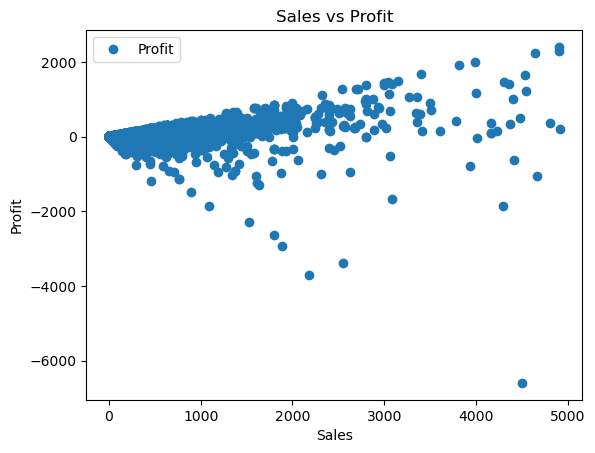

In [49]:
# See how the scatterplot looks without outliers.

df_test.plot(x = 'Sales', y='Profit', style='o')  
plt.title('Sales vs Profit')  
plt.xlabel('Sales')  
plt.ylabel('Profit')  
plt.show()

In [60]:
# Reshape again.

X_2 = df_test['Sales'].values.reshape(-1,1)
y_2 = df_test['Profit'].values.reshape(-1,1)

In [61]:
X_train_2, X_test_2, y_train_2, y_test_2 = train_test_split(X_2, y_2, test_size=0.3, random_state=0)

In [62]:
# Run and fit the regression.

regression = LinearRegression()  
regression.fit(X_train_2, y_train_2)

LinearRegression()

In [63]:
# Predict.

y_predicted_2 = regression.predict(X_test_2)

In [64]:
rmse = mean_squared_error(y_test_2, y_predicted_2)
r2 = r2_score(y_test_2, y_predicted_2)

In [65]:
print('Slope:' ,regression.coef_)
print('Mean squared error: ', rmse)
print('R2 score: ', r2)

Slope: [[0.15475512]]
Mean squared error:  32129.008990649952
R2 score:  0.13499065625759554


### Slope : A positive value indicates as the sale goes up, the profit goes up. It has increased slightly from 0.13 to   0.15 by taking this subset.
### MSE : Its value is reduced from 51349 to 32129 but still , its quite large.

### R2 score : It has decreased from 0.3 to 0.13 indicating a poor fit model.

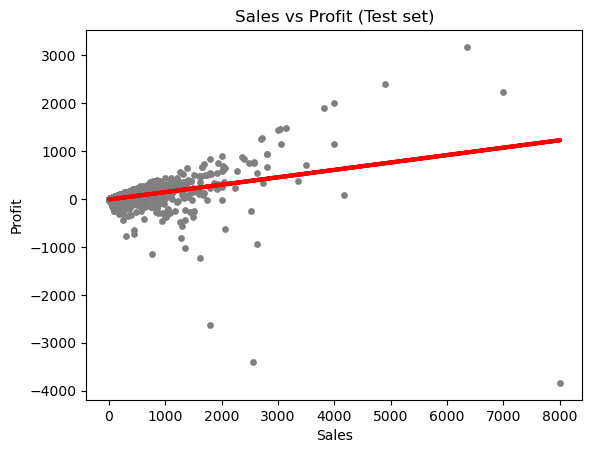

In [68]:
# Visualizing the test set results.
plot_test = plt
plot_test.scatter(X_test_2, y_test_2, color='gray', s = 15)
plot_test.plot(X_test_2, y_predicted_2, color='red', linewidth =3)
plot_test.title('Sales vs Profit (Test set)')
plot_test.xlabel('Sales')
plot_test.ylabel('Profit')
plot_test.show()

In [69]:
data = pd.DataFrame({'Actual': y_test_2.flatten(), 'Predicted': y_predicted_2.flatten()})
data.head(30)

,Actual,Predicted
0,20.1708,2.626208
1,138.4170,64.484923
2,2.0416,-8.290218
3,17.7450,34.558378
4,17.5240,1.050800
5,0.7392,-8.617061
6,8.6940,-6.454823
7,0.8624,-8.998378
8,8.7145,98.509383
9,-19.9824,-5.346157


### The predicted values compared to actual values support the poor fit of the model